In [1]:
import os
import sys
import pandas as pd
from glob import glob
import seaborn as sns
sys.path.append(os.path.abspath('../'))
import metaprofile_across_regions as mar

In [2]:
%%bash
conda env export > metaprofile.yml

In [3]:
# Sample annotation
annot = pd.read_csv('../../../data/general/SampleAnnotation.csv', index_col=0)

## Separate samples
# #Pabpc xlinks
# pabp_xls = glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/*Crick*.bed.gz') + glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/*Proteintech*.bed.gz')
# # Lin28A crosslinks
# lin28_xls = sorted(glob('../../../data/LIN28_220626_results/Crosslinks/*bed*'))

## Merged samples
#Pabpc xlinks
pabp_xls = glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/*Crick*.bed.gz') + glob('../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/*Proteintech*.bed.gz')
# Lin28A crosslinks
lin28_xls = sorted(glob('../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-*bed*'))

dfPaths = pd.DataFrame()
dfPaths['Files'] = lin28_xls + pabp_xls
dfPaths['Sample'] = dfPaths['Files'].apply(lambda x: x.split('/')[-1])
annot = annot.merge(dfPaths, on='Sample', how='inner')

# regions
regs = glob('ProfileRegions/*naive*.bed*')
regDict = {}
for r in regs:
    c = r.split('cond-')[-1].split('.')[0]
    if c not in regDict.keys():
        regDict[c] = [r]
    else:
        regDict[c].append(r)

# Save to
outpath = '../../../results/Metaprofiles/PAS_Quantseq/merged_replicates'
os.makedirs(f'{outpath}', exist_ok=True)

In [4]:
annot

,Sample,Protein,Condition,Experiment,Files
0,LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merg...,LIN28A,S200A_FCL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...
1,LIN28A-WT_ESC_LIF-CHIR_merged.bed.gz,LIN28A,S200WT_FCL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...
2,LIN28A-WT_ESCiLIF_merged.bed.gz,LIN28A,S200WT_2iL,FLAG-IP LIN28A – merged,../../../data/LIN28_220626_results/Crosslinks/...
3,DOX_C1_Crick_merged.bed.gz,PABPC1,S200WT_FCL,Crick – merged,../../../data/Pabpc1Pabpc4Iclip_2022/Crosslink...
4,KO_C1_Crick_merged.bed.gz,PABPC1,KO_FCL,Crick – merged,../../../data/Pabpc1Pabpc4Iclip_2022/Crosslink...
5,DOX_C4_Proteintech_merged.bed.gz,PABPC4,S200WT_FCL,Proteintech – merged,../../../data/Pabpc1Pabpc4Iclip_2022/Crosslink...
6,KO_C4_Proteintech_merged.bed.gz,PABPC4,KO_FCL,Proteintech – merged,../../../data/Pabpc1Pabpc4Iclip_2022/Crosslink...


In [5]:
regDict

{'KO_FCL': ['ProfileRegions/naive_up200_down50_cond-KO_FCL.bed.gz'],
 'S200WT_FCL': ['ProfileRegions/naive_up200_down50_cond-S200WT_FCL.bed.gz'],
 'S200A_FCL': ['ProfileRegions/naive_up200_down50_cond-S200A_FCL.bed.gz'],
 'S200WT_2iL': ['ProfileRegions/naive_up200_down50_cond-S200WT_2iL.bed.gz']}

['../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/KO_C1_Crick_merged.bed.gz', '../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/KO_C4_Proteintech_merged.bed.gz']
All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-S200A_ESC_LIF-CHIR-FGF0220626_MM_1_merged.bed.gz']
All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-WT_ESCiLIF_merged.bed.gz']
All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


['../../../data/LIN28_220626_results/Crosslinks/mergedXls/LIN28A-WT_ESC_LIF-CHIR_merged.bed.gz', '../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/DOX_C1_Crick_merged.bed.gz', '../../../data/Pabpc1Pabpc4Iclip_2022/Crosslinks/mergedXls/DOX_C4_Proteintech_merged.bed.gz']
All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


All regions have the same length: 251


/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2128: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/klara/anaconda3/envs/metaprofile/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2129: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


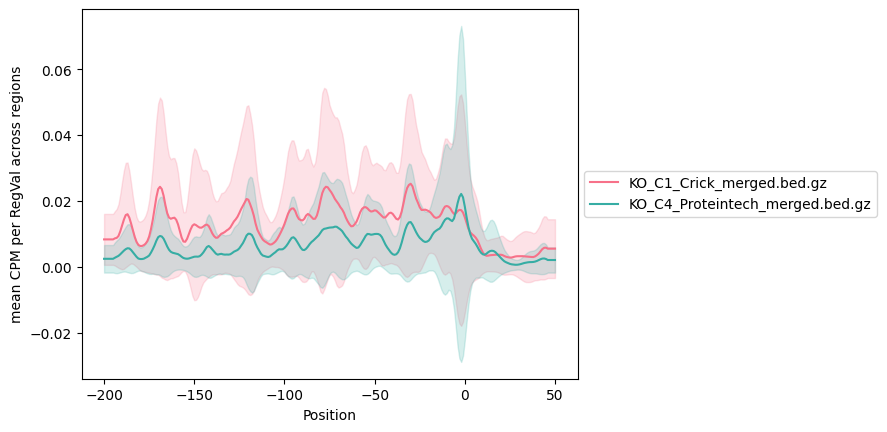

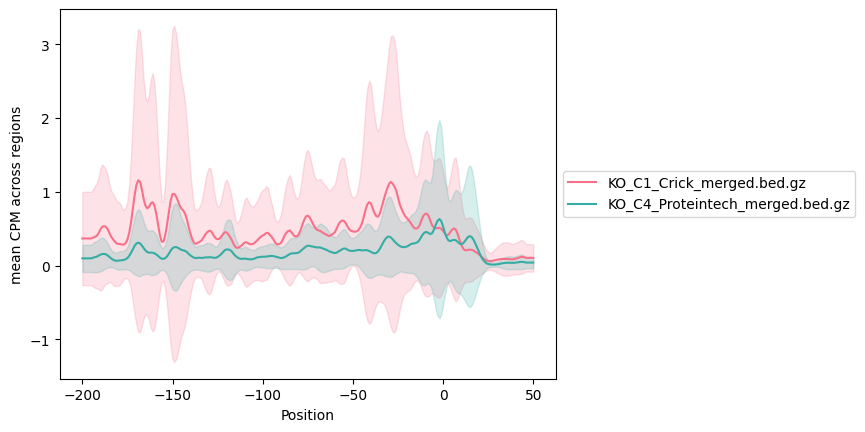

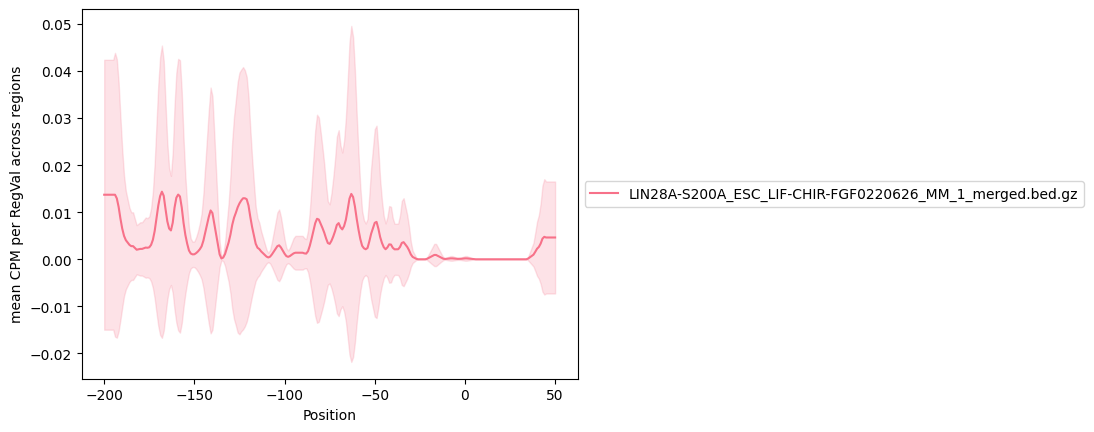

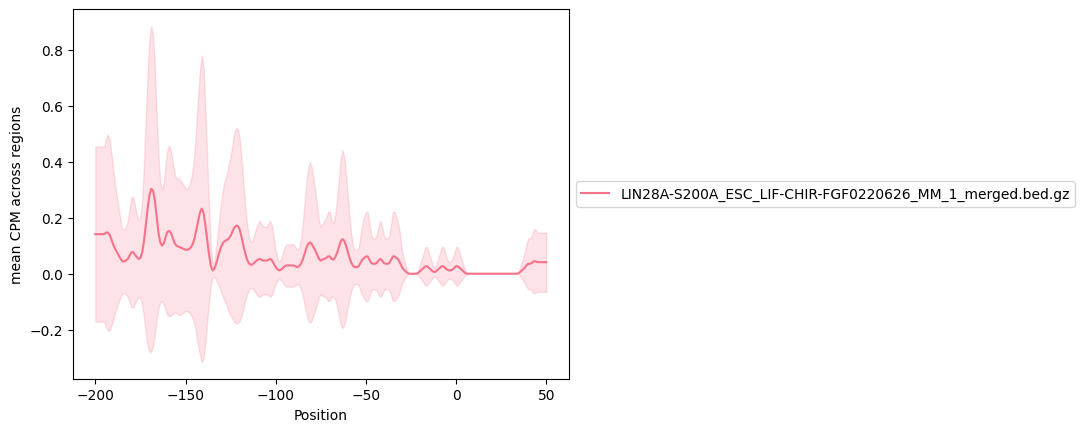

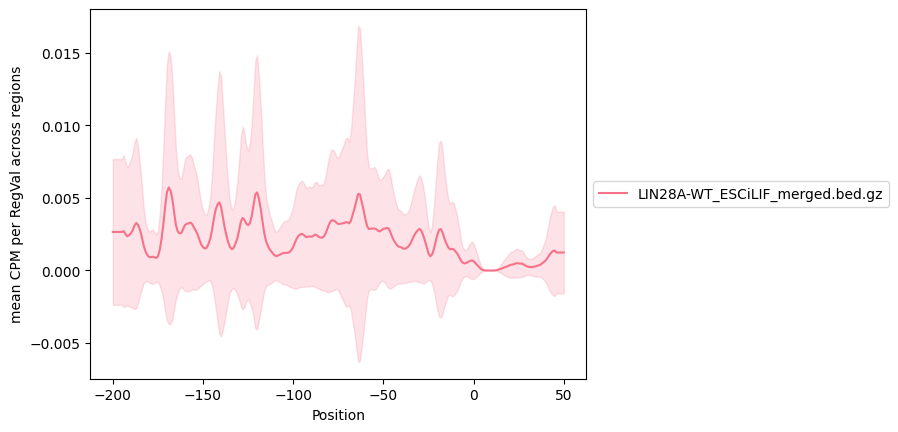

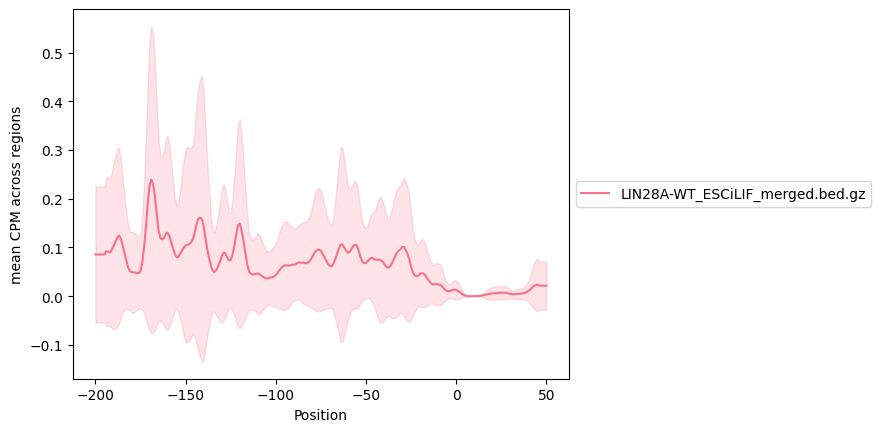

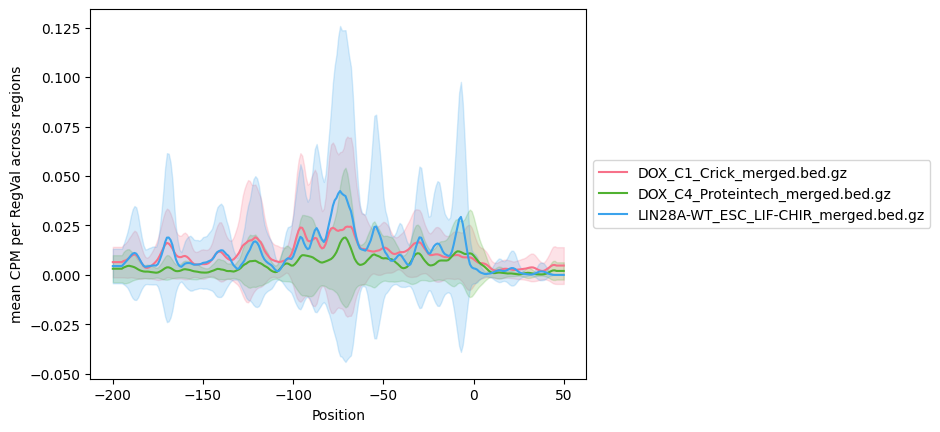

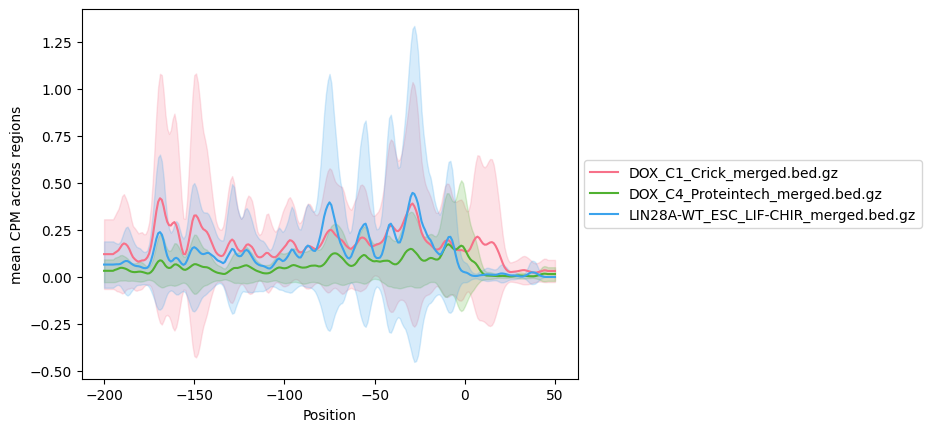

In [6]:
for c, df in annot.groupby('Condition'):
    regs = regDict[c]
    files = df.Files.values.tolist()
    print(files)
    for r in regs:
        out = r.split('/')[-1].split('.')[0].replace('terminal_pa_signals_', '').replace('up200_down50_', '')
        mar.main(r, files, outpath=f'{outpath}/{out}', use_scores=True, sw=10, norm='by_reg', chunk_size=300, pos_limits=(-200, 50))
        mar.main(r, files, outpath=f'{outpath}/{out}', use_scores=True, sw=10, norm='libsize', chunk_size=300, pos_limits=(-200, 50))
